## Import Images

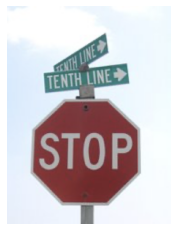

In [2]:
#!/bin/python3

import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd 

# First 51 imgs are semaphores
def importImage(no):
    return cv.imread('dataset/images/road' + str(no) + '.png', cv.IMREAD_COLOR)

def showImage(image, title=""):
    if (len(image.shape) == 3):
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        cmap = None
    else:
        cmap = "gray"
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

showImage(importImage(52))

## Export XML

In [3]:
import xml.etree.ElementTree as ET

df = pd.DataFrame(columns=["type"])

for i in range(0, 877):
    with open(f"dataset/annotations/road{i}.xml") as xml:
        tree = ET.parse(xml)
        root = tree.getroot()
        
        objects = root.findall("object")
        types = []
        for object in objects:
            types.append(object.find("name").text)

        df.loc[i] = ([types])

df.to_csv("dataset/signs.csv")


## Import XML

In [28]:
signs = pd.read_csv("dataset/signs.csv")

def filterType(type):
    def filter(x):
        x["type"] = x["type"].replace("[", "")
        x["type"] = x["type"].replace("]", "")
        x["type"] = x["type"].replace("'", "")
        x["type"] = x["type"].strip()
        x["type"] = x["type"].split(", ")
        return len(set(x["type"]) & set(type)) != 0

    return signs[signs.apply(filter, axis=1)]

filterType(["speedlimit"])

,Unnamed: 0,type
100,100,['speedlimit']
101,101,['speedlimit']
102,102,['speedlimit']
103,103,['speedlimit']
104,104,['speedlimit']
...,...,...
871,871,['speedlimit']
872,872,"['speedlimit', 'stop']"
873,873,"['speedlimit', 'speedlimit', 'stop']"
874,874,"['speedlimit', 'speedlimit', 'stop']"
